In [5]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

In [6]:

# Read csv file into a pandas dataframe
missing_values = ["***", "nan"]
df = pd.read_csv("rainfall_data_bangladesh_1948_to_2014.csv", na_values = missing_values)
# Take a look at the first few rows
d = df.as_matrix()
d.shape
len(df.Station.unique())

/home/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


35

In [7]:
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 1. Rainfall by station 1970 - 2016

In [8]:
station3 = {}
listStation = []
totalRainfall = []
with open('customized_daily_rainfall_data.csv', mode='rU') as f:
    reader = csv.reader(f, delimiter=',')  # dialect=csv.excel_tab?
    for n, row in enumerate(reader):
        if not n:
            # Skip header row (n = 0).
            continue  
        ind, stat, year, month, day, rain = row
        if stat not in station3:
            station3[stat] = list()
            listStation.append(stat)
        rain = parse_int(rain)
        station3[stat].append(rain)
for i in range(len(listStation)):
    totalRainfall.append(np.array(station3[listStation[i]]).sum())
len(totalRainfall)

/home/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


35

compute the mean, the standard deviation, the minimum and the maximum values 

In [9]:
colors = []
import random

number_of_colors = 8

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(listStation))]

station = {}
for i in range(len(listStation)):
    station[listStation[i]] = np.array(station3[listStation[i]]).sum()
total_rain  = list(station.values())
print('================================================================')
print('By station 1970-2016')
print('================================================================')
print ('Mean:', np.mean(total_rain))
print ('Standard deviation:', np.std(total_rain))
print ('Minimum:', np.min(total_rain))
print ('Maximum:', np.max(total_rain))

By station 1970-2016
Mean: 99685.17142857143
Standard deviation: 34889.36283370679
Minimum: 40997
Maximum: 187306


pie chart plot with bokeh

In [10]:


data = pd.Series(station).reset_index(name='value').rename(columns={'index':'station'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors

p = figure(plot_height=900, plot_width=1000, title="Rainfall by station", toolbar_location=None,
        tools="hover", tooltips="@station: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='station', source=data)

show(p)


barplot rainfall by station 1970 - 2016

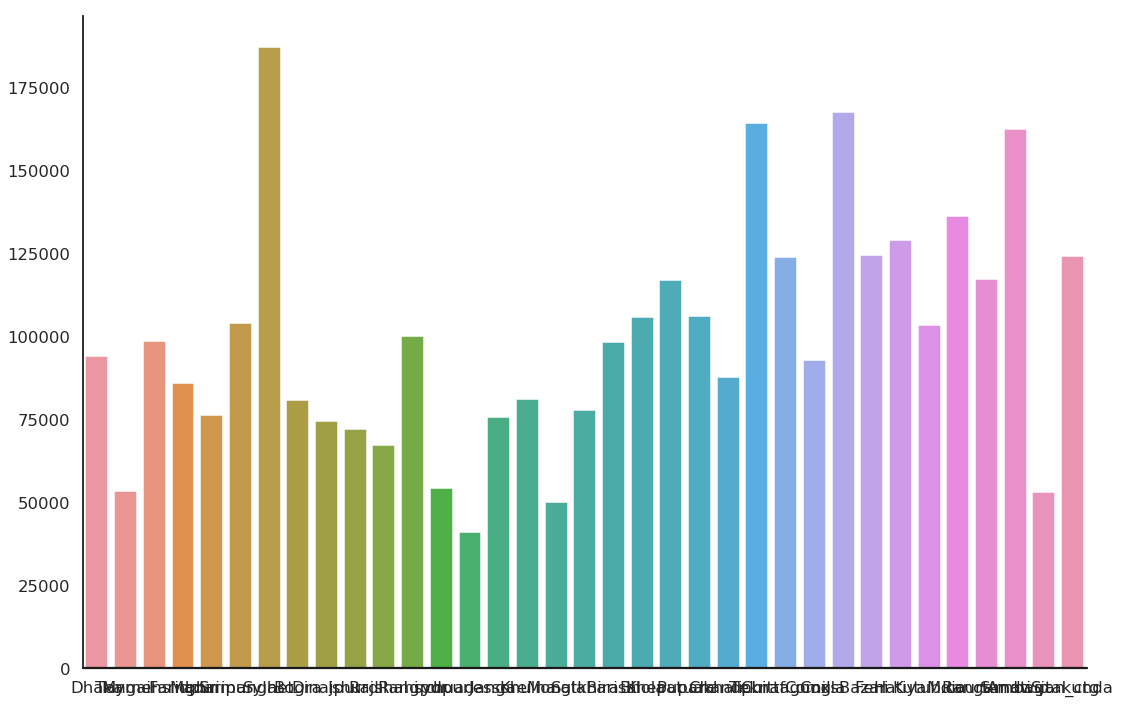

In [11]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
plt.figure(figsize=(18, 12))

sns.barplot(x=listStation, y=totalRainfall, palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

For more visibility I draw first for the first 18 stations and then for the rest

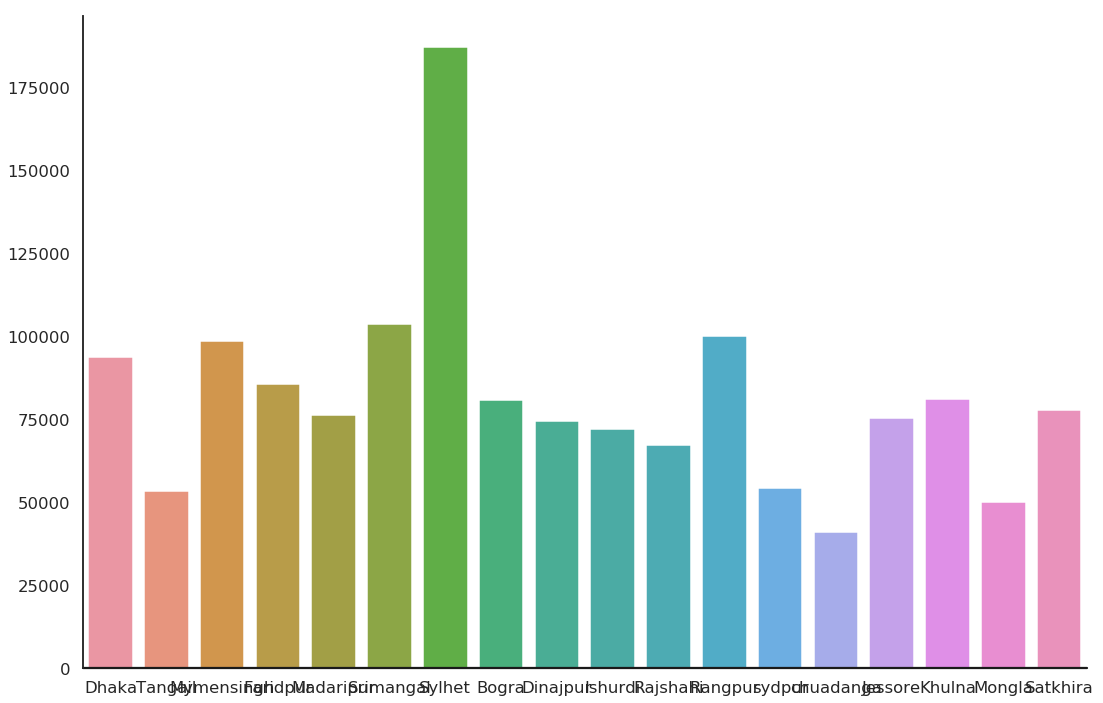

In [12]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
plt.figure(figsize=(18, 12))

sns.barplot(x=listStation[0:18], y=totalRainfall[0:18], palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

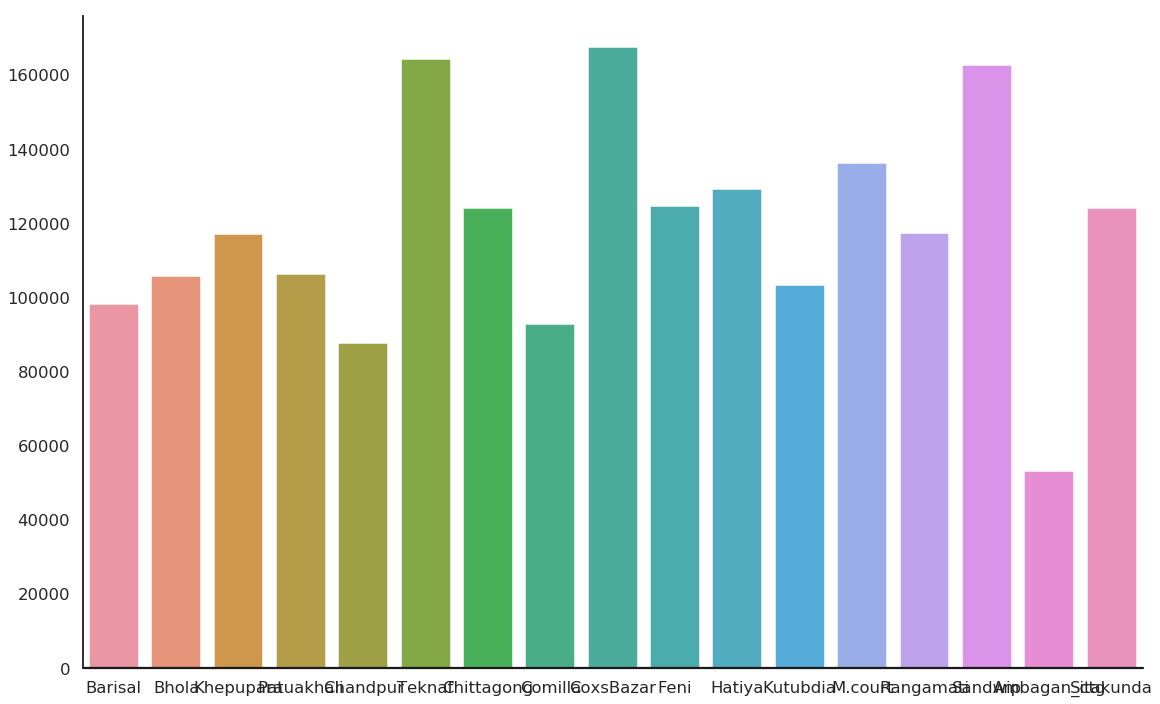

In [13]:
plt.figure(figsize=(19, 12))

sns.barplot(x=listStation[18:35], y=totalRainfall[18:35], palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

# 2. Rainfall by year 1970-2016

In [14]:
years = {}
listyear = []
totalRainfall_by_year = []
with open('customized_daily_rainfall_data.csv', mode='rU') as f:
    reader = csv.reader(f, delimiter=',')  # dialect=csv.excel_tab?
    for n, row in enumerate(reader):
        if not n:
            # Skip header row (n = 0).
            continue  
        ind, stat, year, month, day, rain = row
        if year not in years:
            years[year] = list()
            listyear.append(year)
        rain = parse_int(rain)
        years[year].append(rain)
for i in range(len(listyear)):
    totalRainfall_by_year.append(np.array(years[listyear[i]]).sum())
len(totalRainfall_by_year)

/home/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


47

compute the mean, the standard deviation, the minimum and the maximum values 

In [15]:
colorsYear = []
import random

number_of_colors = 8

colorsYear= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(listyear))]

years1 = {}
for i in range(len(listyear)):
    years1[listyear[i]] = np.array(years[listyear[i]]).sum()
total_rain1  = list(years1.values())
print('================================================================')
print('By year 1970-2016')
print('================================================================')
print ('Mean:', np.mean(total_rain1))
print ('Standard deviation:', np.std(total_rain1))
print ('Minimum:', np.min(total_rain1))
print ('Maximum:', np.max(total_rain1))

By year 1970-2016
Mean: 74233.63829787234
Standard deviation: 15442.625766730838
Minimum: 32020
Maximum: 97460


pie chart plot with bokeh

In [16]:

data = pd.Series(years1).reset_index(name='value').rename(columns={'index':'Year'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colorsYear

p = figure(plot_height=900, plot_width=1000, title="Rainfall by year", toolbar_location=None,
        tools="hover", tooltips="@Year: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Year', source=data)

show(p)


barplot 

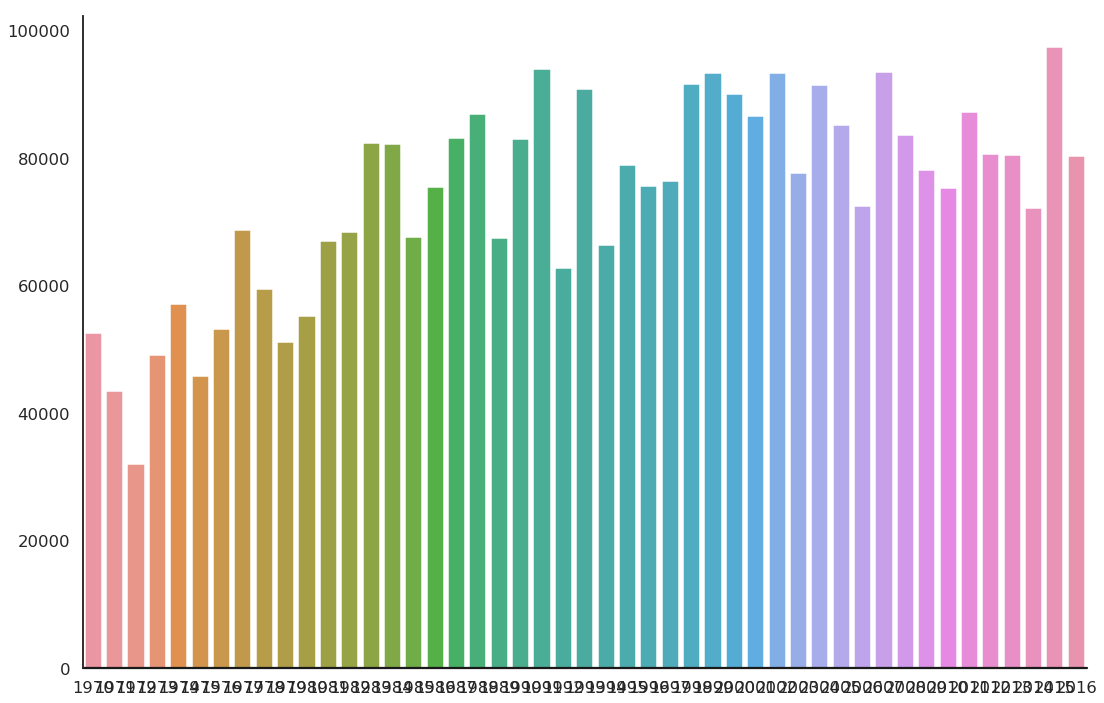

In [17]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
plt.figure(figsize=(18, 12))

sns.barplot(x=listyear, y=totalRainfall_by_year, palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

barplot for the 20 first years

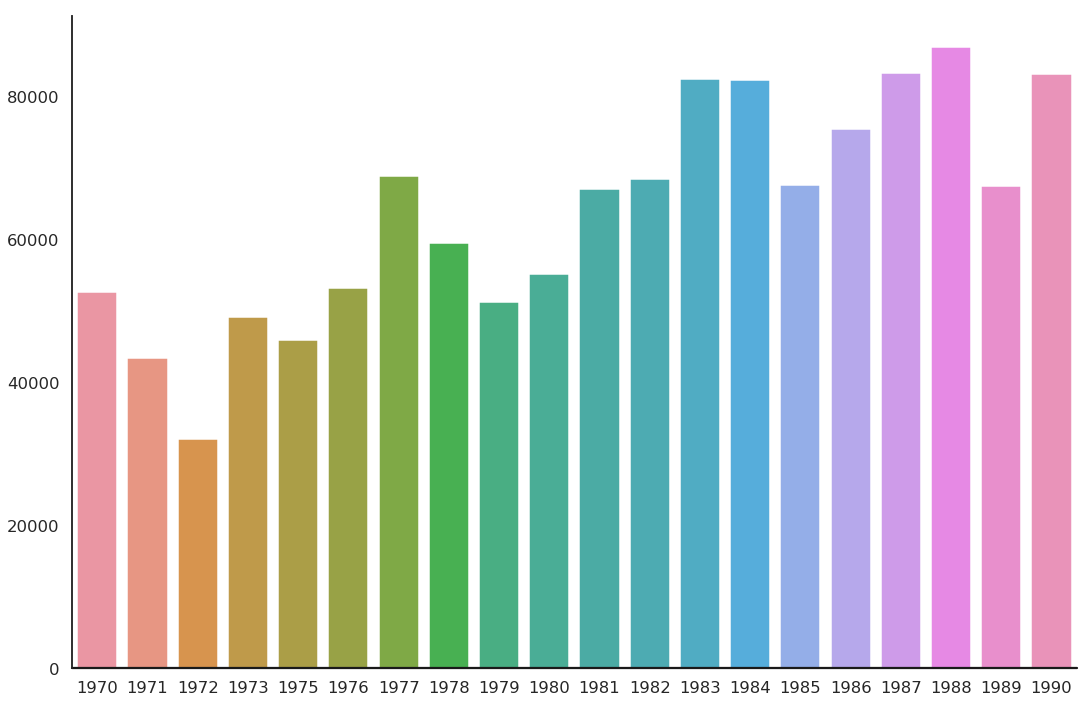

In [18]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
plt.figure(figsize=(18, 12))

sns.barplot(x=listyear[0:20], y=totalRainfall_by_year[0:20], palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

barplot for the 20 second years

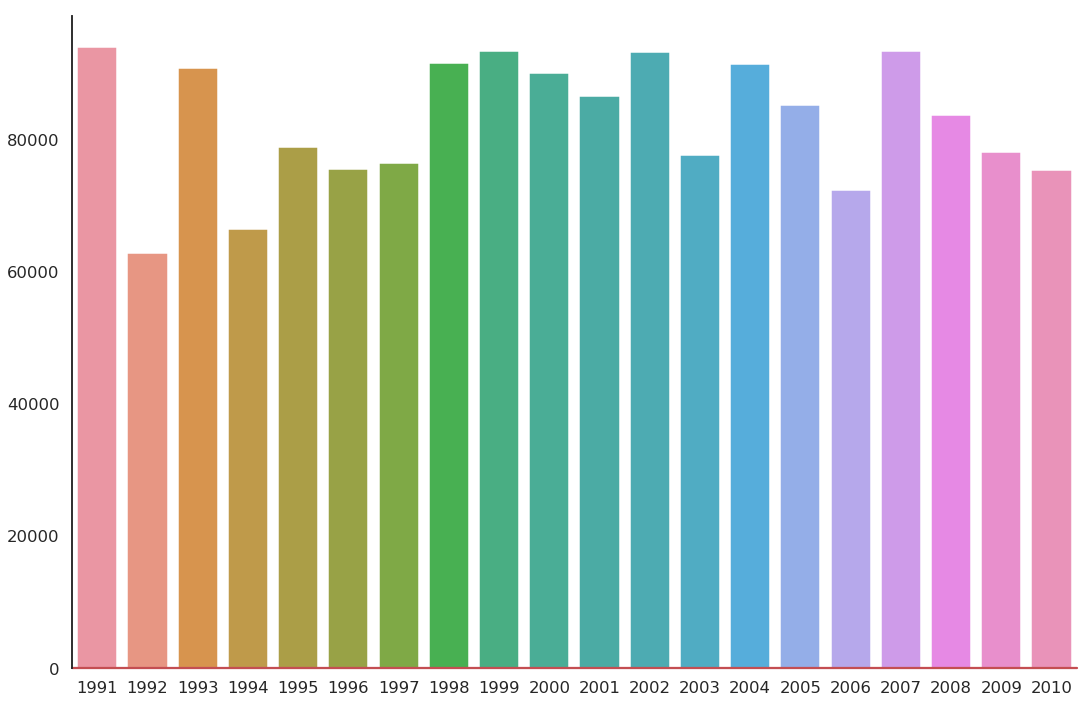

In [19]:
plt.figure(figsize=(18, 12))

sns.barplot(x=listyear[20:40], y=totalRainfall_by_year[20:40], palette= None)
plt.axhline(0, color="r", clip_on=False)
sns.despine(bottom=True)

barplot for the last six years

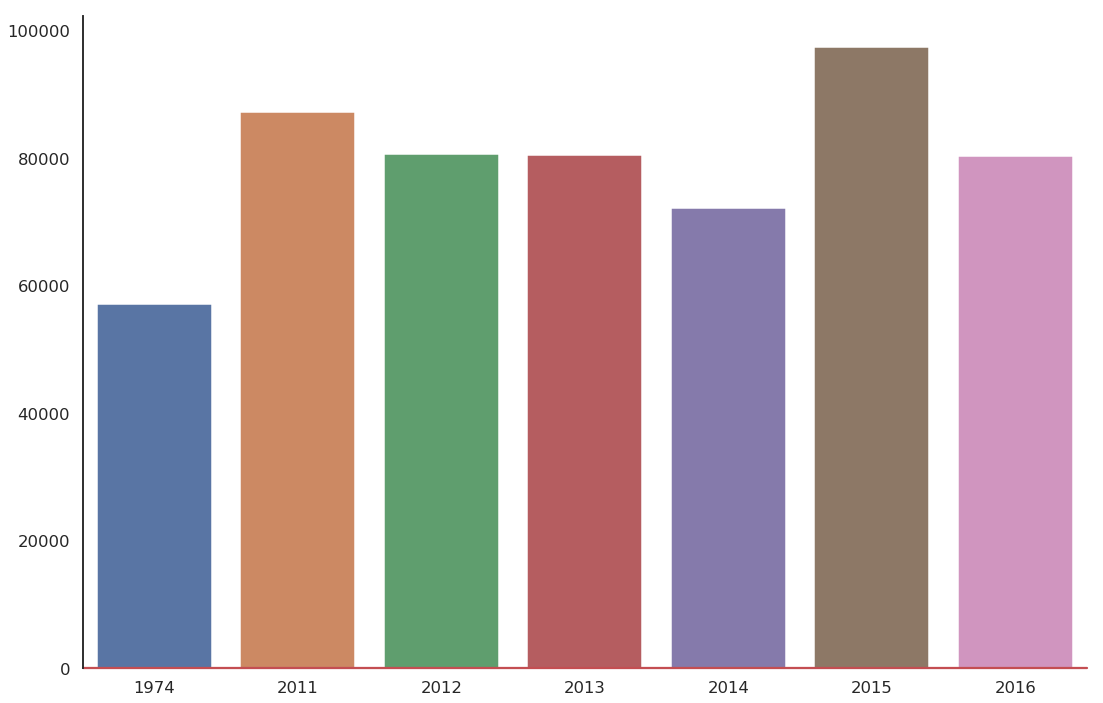

In [20]:
plt.figure(figsize=(18, 12))

sns.barplot(x=listyear[40:47], y=totalRainfall_by_year[40:47], palette= None)
plt.axhline(0, color="r", clip_on=False)
sns.despine(bottom=True)

# 3. Rainfall by year by station:

In [21]:
stationYears = {}
listStation_by_year = []
totalRainfall_by_station_by_year = []
with open('customized_daily_rainfall_data.csv', mode='rU') as f:
    reader = csv.reader(f, delimiter=',')  # dialect=csv.excel_tab?
    for n, row in enumerate(reader):
        if not n:
            # Skip header row (n = 0).
            continue  
        ind, stat, year, month, day, rain = row
        if (stat, year) not in stationYears :
            stationYears [(stat, year)] = list()
            listStation_by_year.append((stat, year))
        rain = parse_int(rain)
        stationYears [(stat, year)].append(rain)
for i in range(len(listStation_by_year)):
    totalRainfall_by_station_by_year.append(np.array(stationYears[listStation_by_year[i]]).sum())

/home/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [22]:
def rainfall_by_oneStation_by_year(station):
    rain = {}
    year_one_station = []
    for stat, year in listStation_by_year:
        if stat == station:
            rain[year] = np.array(stationYears[(stat,year)]).sum()
            year_one_station.append(year)
    return rain, year_one_station

compute the mean, the standard deviation, the minimum and the maximum values (Example for Dhaka and Sydpur)

In [23]:
rain, year_one_station = rainfall_by_oneStation_by_year('Dhaka')
rain1, year_one_station1 = rainfall_by_oneStation_by_year('sydpur')

print('================================================================')
print('for Dhaka')
print('================================================================')
total_rain2  = list(rain.values())
print ('Mean:', np.mean(total_rain2))
print ('Standard deviation:', np.std(total_rain2))
print ('Minimum:', np.min(total_rain2))
print ('Maximum:', np.max(total_rain2))

print('================================================================')
print('for Sydpur')
print('================================================================')
total_rain3  = list(rain1.values())
print ('Mean:', np.mean(total_rain3))
print ('Standard deviation:', np.std(total_rain3))
print ('Minimum:', np.min(total_rain3))
print ('Maximum:', np.max(total_rain3))

for Dhaka
Mean: 2042.6304347826087
Standard deviation: 422.01078487638785
Minimum: 1169
Maximum: 3028
for Sydpur
Mean: 2089.923076923077
Standard deviation: 505.4782140231872
Minimum: 1244
Maximum: 3145


In [24]:
import random


colors_Station_Year  = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(rain))]


colors_Station_Year1  = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(rain1))]

pie chart with bokeh

In [25]:

data = pd.Series(rain).reset_index(name='value').rename(columns={'index':'Year'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors_Station_Year

p = figure(plot_height=900, plot_width=1000, title="Rainfall by year: Dhaka", toolbar_location=None,
        tools="hover", tooltips="@Year: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Year', source=data)

data1 = pd.Series(rain1).reset_index(name='value').rename(columns={'index':'Year'})
data1['angle'] = data1['value']/data1['value'].sum() * 2*pi
data1['color'] = colors_Station_Year1

p1 = figure(plot_height=900, plot_width=1000, title="Rainfall by year: Sydpur", toolbar_location=None,
        tools="hover", tooltips="@Year: @value")

p1.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Year', source=data1)

show(p)
show(p1)

barplot for Sydpur 1970 - 2016

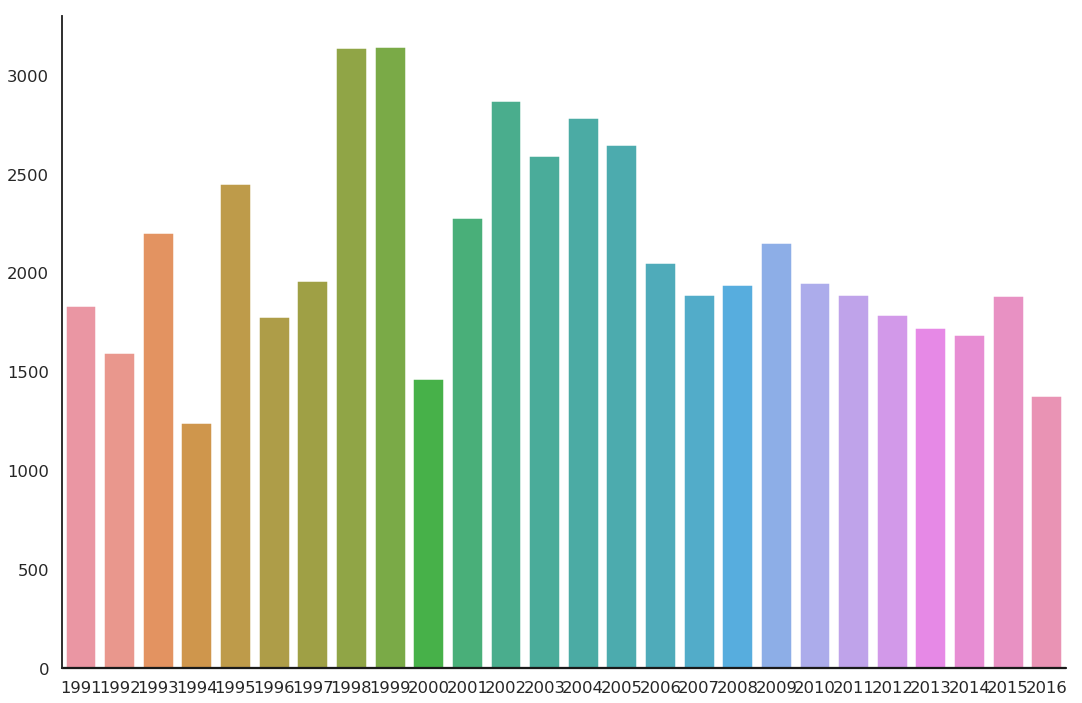

In [26]:
rain_one_station = []
for i in range(len(year_one_station1)):
    rain_one_station.append(rain1[year_one_station1[i]])
    
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
plt.figure(figsize=(18, 12))

sns.barplot(x=year_one_station1, y=rain_one_station, palette= None)
plt.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)

# 4. Rainfall by month 1970-2016

In [27]:
months = {}
listmonth= []
totalRainfall_by_month = []
with open('customized_daily_rainfall_data.csv', mode='rU') as f:
    reader = csv.reader(f, delimiter=',')  # dialect=csv.excel_tab?
    for n, row in enumerate(reader):
        if not n:
            # Skip header row (n = 0).
            continue  
        ind, stat, year, month, day, rain = row
        if month not in months:
            months[month] = list()
            listmonth.append(month)
        rain = parse_int(rain)
        months[month].append(rain)
for i in range(len(listmonth)):
    totalRainfall_by_month.append(np.array(months[listmonth[i]]).sum())
len(totalRainfall_by_month)

/home/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


12

compute the mean, the standard deviation, the minimum and the maximum values

In [28]:
import random


colorsMonth= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(listmonth))]

months1 = {}
for i in range(len(listmonth)):
    months1[listmonth[i]] = np.array(months[listmonth[i]]).sum()


print('================================================================')
print('By month')
print('================================================================')
total_rain4  = list(months1.values())
print ('Mean:', np.mean(total_rain4))
print ('Standard deviation:', np.std(total_rain4))
print ('Minimum:', np.min(total_rain4))
print ('Maximum:', np.max(total_rain4))

By month
Mean: 290748.4166666667
Standard deviation: 266229.16115959774
Minimum: 10584
Maximum: 762637


pie chart plot with bokeh

In [29]:
data = pd.Series(months1).reset_index(name='value').rename(columns={'index':'Month'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colorsMonth

p = figure(plot_height=900, plot_width=1000, title="Rainfall by month", toolbar_location=None,
        tools="hover", tooltips="@Month: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Month', source=data)

show(p)


# 5. Rainfall by station by month 1970-2016